In [1]:
# read nc output from WAOM 10km run

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as ma
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

#import iris
#import iris.iterate
#import iris.coords
#import iris.plot as iplt
import gsw

from mpl_toolkits.axes_grid1.inset_locator import inset_axes


In [2]:
# load ROMS avg output: 10km
for mm  in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    ds = xr.open_dataset('/scratch/project_2000789/boeiradi/waom10extend_shflim_S_0.25Q/output_20yr_diag/ocean_avg_00' + mm + '.nc')
    print(ds.variables["temp"].shape)
    m_tmp = np.nanmean(ds.variables["m"], axis=0)
    
    if mm == '01':
        m_10km = m_tmp

    elif mm == '02':
        m_10km = np.stack((m_10km,m_tmp), axis=0)

    else:
        m_tmp_4thdim = np.expand_dims(m_tmp, axis=0)
        m_10km = np.concatenate((m_10km,m_tmp_4thdim), axis=0) 

    ds.close()
    
dg = xr.open_dataset("/scratch/project_2000339/boeiradi/waom10_frc/waom10extend_grd.nc")

lat_rho_10km = dg.variables["lat_rho"]
lon_rho_10km = dg.variables["lon_rho"]
pm_10km = dg.variables["pm"]
pn_10km = dg.variables["pn"]
dg.close()

ds.coords['lat_rho']=lat_rho_10km.transpose() # put lat_rho into ds dataset
ds.coords['lon_rho']=lon_rho_10km.transpose() # put lon_rho into ds dataset

(7, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


In [3]:
#/scratch/project_2000789/boeiradi/waom4extend_shflim_S_0.25Q/output_yr10_diag/

# load ROMS avg output: 4km
for mm  in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    ds = xr.open_dataset('/scratch/project_2000789/boeiradi/waom4extend_shflim_S_0.25Q/output_yr10_diag/ocean_avg_00' + mm + '.nc')
    print(ds.variables["temp"].shape)
    m_tmp = np.nanmean(ds.variables["m"], axis=0)
    
    if mm == '01':
        m_4km = m_tmp

    elif mm == '02':
        m_4km = np.stack((m_4km,m_tmp), axis=0)

    else:
        m_tmp_4thdim = np.expand_dims(m_tmp, axis=0)
        m_4km = np.concatenate((m_4km,m_tmp_4thdim), axis=0) 

    ds.close()
        
dg = xr.open_dataset("/scratch/project_2000789/boeiradi/waom4_frc/waom4extend_grd.nc")

lat_rho_4km = dg.variables["lat_rho"]
lon_rho_4km = dg.variables["lon_rho"]
pm_4km = dg.variables["pm"]
pn_4km = dg.variables["pn"]
dg.close()

ds.coords['lat_rho']=lat_rho_4km.transpose() # put lat_rho into ds dataset
ds.coords['lon_rho']=lon_rho_4km.transpose() # put lon_rho into ds dataset

(7, 31, 1400, 1575)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


(6, 31, 1400, 1575)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


(6, 31, 1400, 1575)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


(6, 31, 1400, 1575)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


(6, 31, 1400, 1575)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


(6, 31, 1400, 1575)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


(6, 31, 1400, 1575)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


(6, 31, 1400, 1575)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


(6, 31, 1400, 1575)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


(6, 31, 1400, 1575)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


(6, 31, 1400, 1575)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


(6, 31, 1400, 1575)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


In [4]:
#/scratch/project_2000339/boeiradi/waom2extend_shflim_S_0.25Q/output_yr5

# load ROMS avg output: 2km
for mm  in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    ds = xr.open_dataset('/scratch/project_2000339/boeiradi/waom2extend_shflim_S_0.25Q/output_yr5/ocean_avg_00' + mm + '.nc')
    print(ds.variables["temp"].shape)
    m_tmp = np.nanmean(ds.variables["m"], axis=0)
    
    if mm == '01':
        m_2km = m_tmp

    elif mm == '02':
        m_2km = np.stack((m_2km,m_tmp), axis=0)

    else:
        m_tmp_4thdim = np.expand_dims(m_tmp, axis=0)
        m_2km = np.concatenate((m_2km,m_tmp_4thdim), axis=0) 

    ds.close()
        
dg = xr.open_dataset("/scratch/project_2000339/boeiradi/waom2_frc/waom2extend_grd.nc")

lat_rho_2km = dg.variables["lat_rho"]
lon_rho_2km = dg.variables["lon_rho"]
pm_2km = dg.variables["pm"]
pn_2km = dg.variables["pn"]
dg.close()

ds.coords['lat_rho']=lat_rho_2km.transpose() # put lat_rho into ds dataset
ds.coords['lon_rho']=lon_rho_2km.transpose() # put lon_rho into ds dataset

(7, 31, 2800, 3150)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


(6, 31, 2800, 3150)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


(5, 31, 2800, 3150)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


(7, 31, 2800, 3150)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


(6, 31, 2800, 3150)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


(5, 31, 2800, 3150)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


(7, 31, 2800, 3150)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


(6, 31, 2800, 3150)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


(5, 31, 2800, 3150)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


(7, 31, 2800, 3150)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


(6, 31, 2800, 3150)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


(5, 31, 2800, 3150)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


In [5]:
### plot some maps
import matplotlib.path as mpath
import cartopy.feature as cfeature
import matplotlib.colors as colors

def lonlat_labels(ax):
    # latitude labels
    ax.text(120,-80,'80$^{\circ}$S',transform=ccrs.PlateCarree(),color='gray')
    ax.text(120,-70,'70$^{\circ}$S',transform=ccrs.PlateCarree(),color='gray')
    # longitude labels
    ax.text(0,-66,'0$^{\circ}$',transform=ccrs.PlateCarree(),color='gray')
    #ax.text(60,-53,'60$^{\circ}$E',transform=ccrs.PlateCarree(),color='gray')
    #ax.text(120,-53,'120$^{\circ}$E',transform=ccrs.PlateCarree(),color='gray')
    ax.text(-60,-48,'60$^{\circ}$W',transform=ccrs.PlateCarree(),color='gray')
    ax.text(-120,-48,'120$^{\circ}$W',transform=ccrs.PlateCarree(),color='gray')
    ax.text(180,-60,'180$^{\circ}$',transform=ccrs.PlateCarree(),color='gray')
    return

proj = ccrs.SouthPolarStereo()

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice


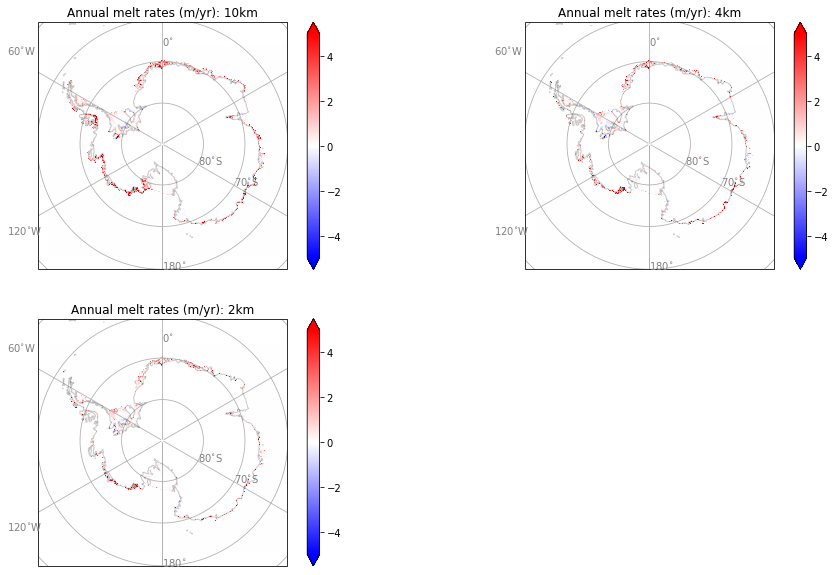

In [6]:
# plotting surface fluxes:
fig_path = '/users/boeiradi/COLD_project/postprocessing/figs/Melt_rates/'

# define your scale, with white at zero
vmin = -5 
vmax = 5
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

proj = ccrs.SouthPolarStereo()
fig = plt.figure(figsize=(16,10))
 
ax1 = fig.add_subplot(221, projection=proj)
plt.title('Annual melt rates (m/yr): 10km')
cy=plt.pcolormesh(lon_rho_10km,lat_rho_10km,np.nanmean(m_10km, axis=0)*86400*365, transform=ccrs.PlateCarree(), cmap=plt.cm.bwr, vmin=vmin, vmax=vmax, norm=norm) 
plt.colorbar(cy, extend='both')
ax1.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
lonlat_labels(ax1)
ax1.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE, zorder=4, edgecolor='black', alpha=0.2) 
# plt.clim(-2,6)


ax2 = fig.add_subplot(222, projection=proj)
plt.title('Annual melt rates (m/yr): 4km')
cy=plt.pcolormesh(lon_rho_4km,lat_rho_4km,np.nanmean(m_4km, axis=0)*86400*365, transform=ccrs.PlateCarree(), cmap=plt.cm.bwr, vmin=vmin, vmax=vmax, norm=norm) 
plt.colorbar(cy, extend='both')
ax2.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
lonlat_labels(ax2)
ax2.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.COASTLINE, zorder=4, edgecolor='black', alpha=0.2) 
# plt.clim(-2,6)

ax3 = fig.add_subplot(223, projection=proj)
plt.title('Annual melt rates (m/yr): 2km')
cy=plt.pcolormesh(lon_rho_2km,lat_rho_2km,np.nanmean(m_2km, axis=0)*86400*365, transform=ccrs.PlateCarree(), cmap=plt.cm.bwr, vmin=vmin, vmax=vmax, norm=norm) 
plt.colorbar(cy, extend='both')
ax3.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
lonlat_labels(ax3)
ax3.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.COASTLINE, zorder=4, edgecolor='black', alpha=0.2) 
# plt.clim(-2,6)


#plt.show()
                                                
name_fig="waom10x4x2extend_shflim_S_0.25Q_melt_rates_maps_annual_yr20.png"
plt.savefig(fig_path + name_fig, dpi=300)
#plt.close()

In [7]:
plt.show()

In [8]:
bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')
# limits for contour of ice front (Ronne-Filchner IS):
xlimit = np.arange(300,500,1)
ylimit = np.arange(100,300,1)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: Mean of empty slice


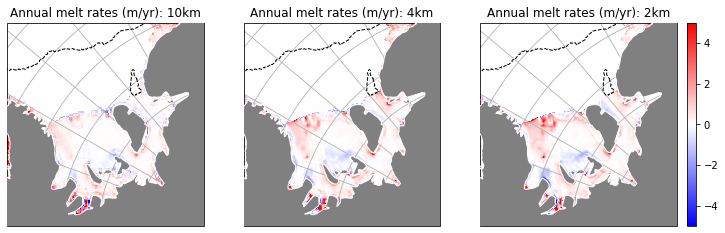

In [9]:

fig = plt.figure(figsize=(12,5))
 
ax1 = fig.add_subplot(131, projection=proj)
plt.title('Annual melt rates (m/yr): 10km')
cy=plt.pcolormesh(lon_rho_10km,lat_rho_10km,np.nanmean(m_10km, axis=0)*86400*365, transform=ccrs.PlateCarree(), cmap=plt.cm.bwr, vmin=vmin, vmax=vmax, norm=norm) 
ax1.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
#lonlat_labels(ax1)
ax1.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax1.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
# plt.contour(lon_rho_10km[xlimit,ylimit], lat_rho_10km[xlimit,ylimit],zice_10km[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
# plt.contour(lon_rho_10km[xlimit,ylimit], lat_rho_10km[xlimit,ylimit],h_10km[xlimit,ylimit],levels=(200,400,600,800,1000), transform=ccrs.PlateCarree(), colors='grey')
# plt.clim(-2,6)


ax2 = fig.add_subplot(132, projection=proj)
plt.title('Annual melt rates (m/yr): 4km')
cy=plt.pcolormesh(lon_rho_4km,lat_rho_4km,np.nanmean(m_4km, axis=0)*86400*365, transform=ccrs.PlateCarree(), cmap=plt.cm.bwr, vmin=vmin, vmax=vmax, norm=norm) 
ax2.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
#lonlat_labels(ax2)
ax2.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax2.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
# plt.clim(-2,6)

ax3 = fig.add_subplot(133, projection=proj)
plt.title('Annual melt rates (m/yr): 2km')
cy=plt.pcolormesh(lon_rho_2km,lat_rho_2km,np.nanmean(m_2km, axis=0)*86400*365, transform=ccrs.PlateCarree(), cmap=plt.cm.bwr, vmin=vmin, vmax=vmax, norm=norm) 
#plt.colorbar(cy, extend='both')
ax3.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
#lonlat_labels(ax3)
ax3.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax3.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
# plt.clim(-2,6)

axins = inset_axes(ax3,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=ax3.transAxes,
                   borderpad=0,
                   )
fig.colorbar(cy, cax=axins, orientation="vertical")
                                                
name_fig="waom10x4x2extend_shflim_S_0.25Q_melt_rates_maps_annual_yr20_RFIS.png"
plt.savefig(fig_path + name_fig, dpi=300)
#plt.close()

plt.show()

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


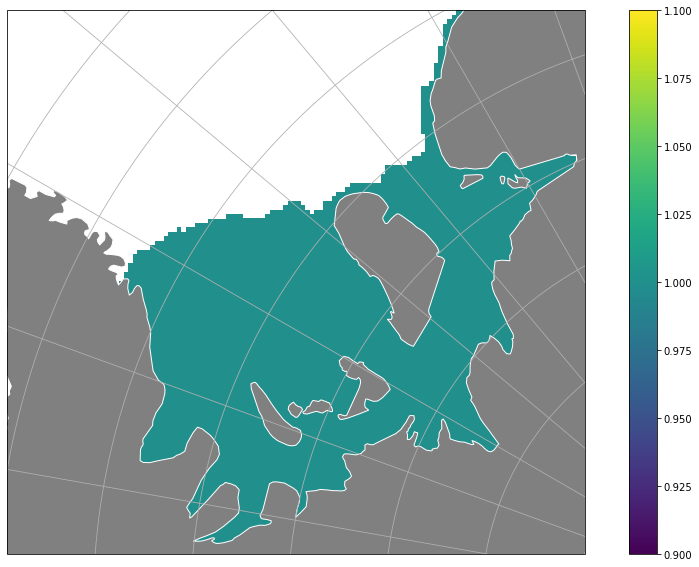

In [24]:
##### calculating average basal melt for FRIS:

# mask for FRIS:

# 10km: zice
di = xr.open_dataset('/scratch/project_2000789/boeiradi/waom10extend_shflim_S_0.25Q/output_20yr_diag/ocean_avg_0001.nc')
ice_draft = di.variables["zice"]
mask_outice_10km = ma.masked_where(ice_draft >= 0, np.ones(ice_draft.shape))
# lon
mask_lonFRIS_lt = ma.masked_where(lon_rho_10km >= -23.8, np.ones(lon_rho_10km.shape))
mask_lonFRIS_gt = ma.masked_where(lon_rho_10km <= -85, np.ones(lon_rho_10km.shape))
mask_lonFRIS_10km = mask_lonFRIS_gt*mask_lonFRIS_lt
# lat 
mask_latFRIS_10km = ma.masked_where(lat_rho_10km > -75, np.ones(lon_rho_10km.shape))
# combining:
mask_FRIS_10km = mask_outice_10km*mask_latFRIS_10km*mask_lonFRIS_10km

# 10km: zice
di = xr.open_dataset('/scratch/project_2000789/boeiradi/waom4extend_shflim_S_0.25Q/output_yr10_diag/ocean_avg_0001.nc')
ice_draft = di.variables["zice"]
mask_outice_4km = ma.masked_where(ice_draft >= 0, np.ones(ice_draft.shape))
# lon
mask_lonFRIS_lt = ma.masked_where(lon_rho_4km >= -23.8, np.ones(lon_rho_4km.shape))
mask_lonFRIS_gt = ma.masked_where(lon_rho_4km <= -85, np.ones(lon_rho_4km.shape))
mask_lonFRIS_4km = mask_lonFRIS_gt*mask_lonFRIS_lt
# lat 
mask_latFRIS_4km = ma.masked_where(lat_rho_4km > -75, np.ones(lon_rho_4km.shape))
# combining:
mask_FRIS_4km = mask_outice_4km*mask_latFRIS_4km*mask_lonFRIS_4km

# 10km: zice
di = xr.open_dataset('/scratch/project_2000339/boeiradi/waom2extend_shflim_S_0.25Q/output_yr5/ocean_avg_0001.nc')
ice_draft = di.variables["zice"]
mask_outice_2km = ma.masked_where(ice_draft >= 0, np.ones(ice_draft.shape))
# lon
mask_lonFRIS_lt = ma.masked_where(lon_rho_2km >= -23.8, np.ones(lon_rho_2km.shape))
mask_lonFRIS_gt = ma.masked_where(lon_rho_2km <= -85, np.ones(lon_rho_2km.shape))
mask_lonFRIS_2km = mask_lonFRIS_gt*mask_lonFRIS_lt
# lat 
mask_latFRIS_2km = ma.masked_where(lat_rho_2km > -75, np.ones(lon_rho_2km.shape))
# combining:
mask_FRIS_2km = mask_outice_2km*mask_latFRIS_2km*mask_lonFRIS_2km


fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection=proj)
plt.pcolormesh(lon_rho_10km,lat_rho_10km,mask_FRIS_10km, transform=ccrs.PlateCarree())
# plt.pcolormesh(lon_rho_4km,lat_rho_4km,mask_FRIS_4km, transform=ccrs.PlateCarree())
# plt.pcolormesh(lon_rho_2km,lat_rho_2km,mask_FRIS_2km, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='white', facecolor='gray')
ax.gridlines()
ax.set_extent([-80, -40, -84, -74], crs=ccrs.PlateCarree())
plt.colorbar()
plt.show()


12128.645465937429
1252.3413744187694


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


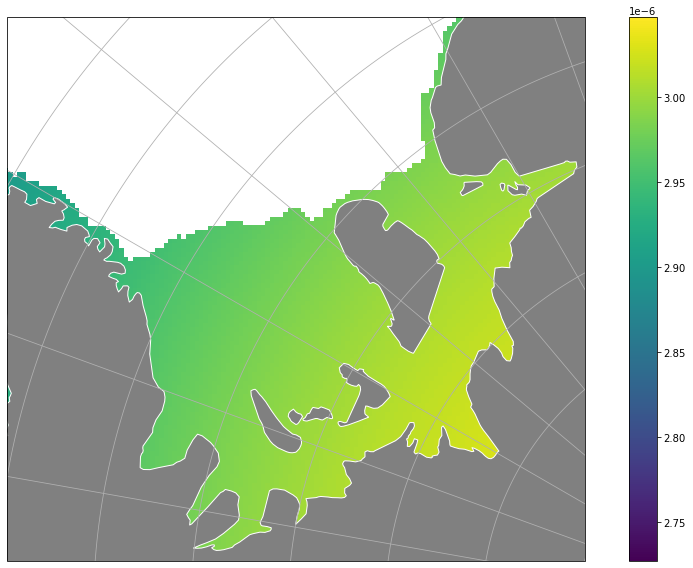

In [40]:
# dA_10km = (1/(pm_10km*pn_10km))
dA_10km = ((pm_10km*pn_10km)**-1)
weights_10km = dA_10km/dA_10km.sum()

check_area = np.nansum(np.nansum(dA_10km*mask_outice_10km, axis=1),axis=0)
print(check_area*10**-9) # m2 to km2 (*1e-6) and 1e3 km2

check_area = np.nansum(np.nansum(dA_10km*mask_FRIS_10km, axis=1),axis=0)
print(check_area*10**-9) # m2 to km2 (*1e-6) and 1e3 km2

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection=proj)
plt.pcolormesh(lon_rho_10km,lat_rho_10km,weights_10km*mask_outice_10km, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='white', facecolor='gray')
ax.gridlines()
ax.set_extent([-80, -40, -84, -74], crs=ccrs.PlateCarree())
plt.colorbar()
plt.show()


In [28]:
# Integrate basal melt rates throughout FRIS:

dA_10km = (1/(pm_10km*pn_10km))
weights_10km = dA_10km/dA_10km.sum()

m_10km_ann = np.nanmean(m_10km, axis=0)*86400*365.25
m_10km_ann_FRIS = np.nansum(np.nansum(m_10km_ann*weights_10km*mask_FRIS_10km,axis=1), axis=0)
print(m_10km_ann_FRIS) # m/yr
print(m_10km_ann_FRIS*916*1e-12) # Gt/yr = m/yr * rho_ice(916) *1e-12

dA_4km = (1/(pm_4km*pn_4km))
weights_4km = dA_4km/dA_4km.sum()

m_4km_ann = np.nanmean(m_4km, axis=0)*86400*365.25
m_4km_ann_FRIS = np.nansum(np.nansum(m_4km_ann*weights_4km*mask_FRIS_4km,axis=1), axis=0)
print(m_4km_ann_FRIS)
print(m_4km_ann_FRIS*916*1e-12) # Gt/yr

dA_2km = (1/(pm_2km*pn_2km))
weights_2km = dA_2km/dA_2km.sum()

m_2km_ann = np.nanmean(m_2km, axis=0)*86400*365.25
m_2km_ann_FRIS = np.nansum(np.nansum(m_2km_ann*weights_2km*mask_FRIS_2km,axis=1), axis=0)
print(m_2km_ann_FRIS)
print(m_2km_ann_FRIS*916*1e-12) # Gt/yr


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


0.0011671315935453208
1.0690925396875138e-10
0.002974311640316187
2.7244694625296275e-12
0.0031629459351426707
2.897258476590686e-12


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice


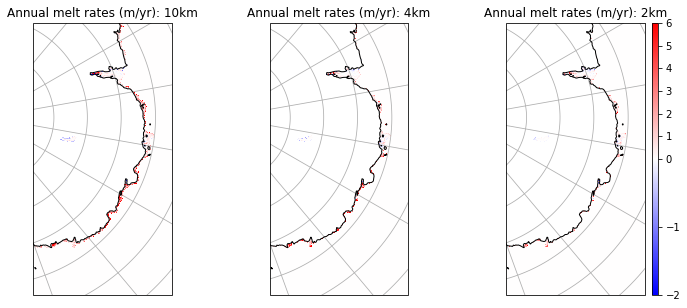

In [12]:
# East Antarctica

fig = plt.figure(figsize=(12,5))
 
ax1 = fig.add_subplot(131, projection=proj)
plt.title('Annual melt rates (m/yr): 10km')
cy=plt.pcolormesh(lon_rho_10km,lat_rho_10km,np.nanmean(m_10km, axis=0)*86400*365, transform=ccrs.PlateCarree(), cmap=plt.cm.bwr, vmin=vmin, vmax=vmax, norm=norm) 
ax1.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
#lonlat_labels(ax1)
ax1.set_extent([60, 160, -70, -62], ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE, zorder=4, edgecolor='black')#, alpha=0.2) 
plt.clim(-2,6)


ax2 = fig.add_subplot(132, projection=proj)
plt.title('Annual melt rates (m/yr): 4km')
cy=plt.pcolormesh(lon_rho_4km,lat_rho_4km,np.nanmean(m_4km, axis=0)*86400*365, transform=ccrs.PlateCarree(), cmap=plt.cm.bwr, vmin=vmin, vmax=vmax, norm=norm) 
ax2.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
#lonlat_labels(ax2)
ax2.set_extent([60, 160, -70, -62], ccrs.PlateCarree())
ax2.add_feature(cfeature.COASTLINE, zorder=4, edgecolor='black')#, alpha=0.2) 
plt.clim(-2,6)

ax3 = fig.add_subplot(133, projection=proj)
plt.title('Annual melt rates (m/yr): 2km')
cy=plt.pcolormesh(lon_rho_2km,lat_rho_2km,np.nanmean(m_2km, axis=0)*86400*365, transform=ccrs.PlateCarree(), cmap=plt.cm.bwr, vmin=vmin, vmax=vmax, norm=norm) 
#plt.colorbar(cy, extend='both')
ax3.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
#lonlat_labels(ax3)
ax3.set_extent([60, 160, -70, -62], ccrs.PlateCarree())
ax3.add_feature(cfeature.COASTLINE, zorder=4, edgecolor='black')#, alpha=0.2) 
plt.clim(-2,6)
            
    
axins = inset_axes(ax3,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=ax3.transAxes,
                   borderpad=0,
                   )
fig.colorbar(cy, cax=axins, orientation="vertical")

name_fig="waom10x4x2extend_shflim_S_0.25Q_melt_rates_maps_annual_yr20_EAnt.png"
plt.savefig(fig_path + name_fig, dpi=300)
#plt.close()
plt.show()

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice


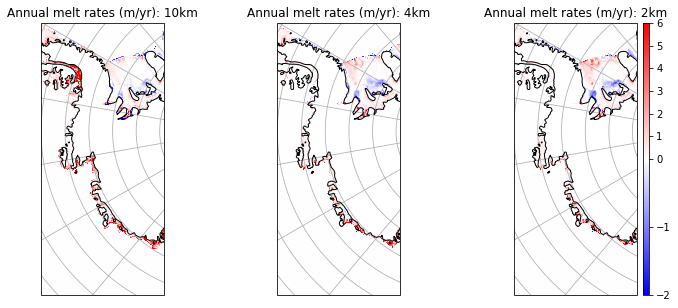

In [11]:
# West Antarctica

fig = plt.figure(figsize=(12,5))
 
ax1 = fig.add_subplot(131, projection=proj)
plt.title('Annual melt rates (m/yr): 10km')
cy=plt.pcolormesh(lon_rho_10km,lat_rho_10km,np.nanmean(m_10km, axis=0)*86400*365, transform=ccrs.PlateCarree(), cmap=plt.cm.bwr, vmin=vmin, vmax=vmax, norm=norm) 
ax1.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
#lonlat_labels(ax1)
ax1.set_extent([-150, -55, -76, -70], ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE, zorder=4, edgecolor='black')#, alpha=0.2) 
plt.clim(-2,6)


ax2 = fig.add_subplot(132, projection=proj)
plt.title('Annual melt rates (m/yr): 4km')
cy=plt.pcolormesh(lon_rho_4km,lat_rho_4km,np.nanmean(m_4km, axis=0)*86400*365, transform=ccrs.PlateCarree(), cmap=plt.cm.bwr, vmin=vmin, vmax=vmax, norm=norm) 
ax2.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
#lonlat_labels(ax2)
ax2.set_extent([-150, -55, -76, -70], ccrs.PlateCarree())
ax2.add_feature(cfeature.COASTLINE, zorder=4, edgecolor='black')#, alpha=0.2) 
plt.clim(-2,6)

ax3 = fig.add_subplot(133, projection=proj)
plt.title('Annual melt rates (m/yr): 2km')
cy=plt.pcolormesh(lon_rho_2km,lat_rho_2km,np.nanmean(m_2km, axis=0)*86400*365, transform=ccrs.PlateCarree(), cmap=plt.cm.bwr, vmin=vmin, vmax=vmax, norm=norm) 
#plt.colorbar(cy, extend='both')
ax3.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
#lonlat_labels(ax3)
ax3.set_extent([-150, -55, -76, -70], ccrs.PlateCarree())
ax3.add_feature(cfeature.COASTLINE, zorder=4, edgecolor='black')#, alpha=0.2) 
plt.clim(-2,6)
            
    
axins = inset_axes(ax3,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=ax3.transAxes,
                   borderpad=0,
                   )
fig.colorbar(cy, cax=axins, orientation="vertical")

name_fig="waom10x4x2extend_shflim_S_0.25Q_melt_rates_maps_annual_yr20_WAnt.png"
plt.savefig(fig_path + name_fig, dpi=300)
#plt.close()
plt.show()

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


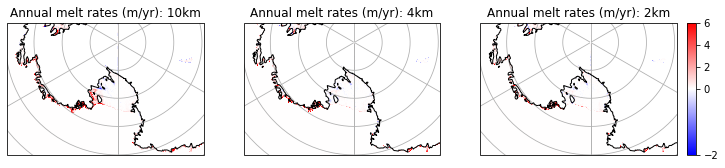

In [86]:

fig = plt.figure(figsize=(12,5))
 
ax1 = fig.add_subplot(131, projection=proj)
plt.title('Annual melt rates (m/yr): 10km')
cy=plt.pcolormesh(lon_rho_10km,lat_rho_10km,np.nanmean(m_10km, axis=0)*86400*365, transform=ccrs.PlateCarree(), cmap=plt.cm.bwr, vmin=vmin, vmax=vmax, norm=norm) 
ax1.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
#lonlat_labels(ax1)
ax1.set_extent([130, 280, -85, -70], ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE, zorder=4, edgecolor='black')#, alpha=0.2) 
plt.clim(-2,6)


ax2 = fig.add_subplot(132, projection=proj)
plt.title('Annual melt rates (m/yr): 4km')
cy=plt.pcolormesh(lon_rho_4km,lat_rho_4km,np.nanmean(m_4km, axis=0)*86400*365, transform=ccrs.PlateCarree(), cmap=plt.cm.bwr, vmin=vmin, vmax=vmax, norm=norm) 
ax2.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
#lonlat_labels(ax2)
ax2.set_extent([130, 280, -85, -70], ccrs.PlateCarree())
ax2.add_feature(cfeature.COASTLINE, zorder=4, edgecolor='black')#, alpha=0.2) 
plt.clim(-2,6)

ax3 = fig.add_subplot(133, projection=proj)
plt.title('Annual melt rates (m/yr): 2km')
cy=plt.pcolormesh(lon_rho_2km,lat_rho_2km,np.nanmean(m_2km, axis=0)*86400*365, transform=ccrs.PlateCarree(), cmap=plt.cm.bwr, vmin=vmin, vmax=vmax, norm=norm) 
#plt.colorbar(cy, extend='both')
ax3.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
#lonlat_labels(ax3)
ax3.set_extent([130, 280, -85, -70], ccrs.PlateCarree())
ax3.add_feature(cfeature.COASTLINE, zorder=4, edgecolor='black')#, alpha=0.2) 
plt.clim(-2,6)
            
    
axins = inset_axes(ax3,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=ax3.transAxes,
                   borderpad=0,
                   )
fig.colorbar(cy, cax=axins, orientation="vertical")

name_fig="waom10x4x2extend_shflim_S_0.25Q_melt_rates_maps_annual_yr20_RIS.png"
plt.savefig(fig_path + name_fig, dpi=300)
#plt.close()
plt.show()

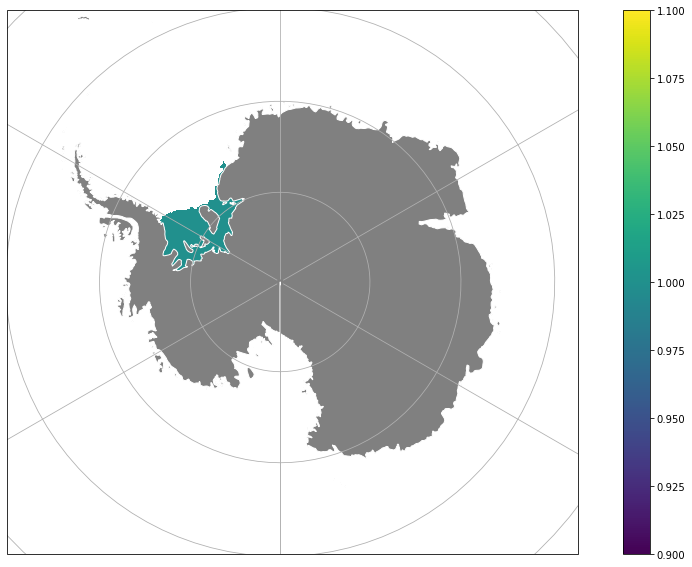

In [64]:
# Combining masks:
#mask_outice_10km
#mask_latFRIS
#mask_lonFRIS

mask_FRIS = mask_outice_10km*mask_latFRIS*mask_lonFRIS

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection=proj)
plt.pcolormesh(lon_rho_10km,lat_rho_10km,mask_FRIS, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='white', facecolor='gray')
ax.gridlines()
# ax.set_extent([-80, -40, -84, -74], crs=ccrs.PlateCarree())
plt.colorbar()
plt.show()


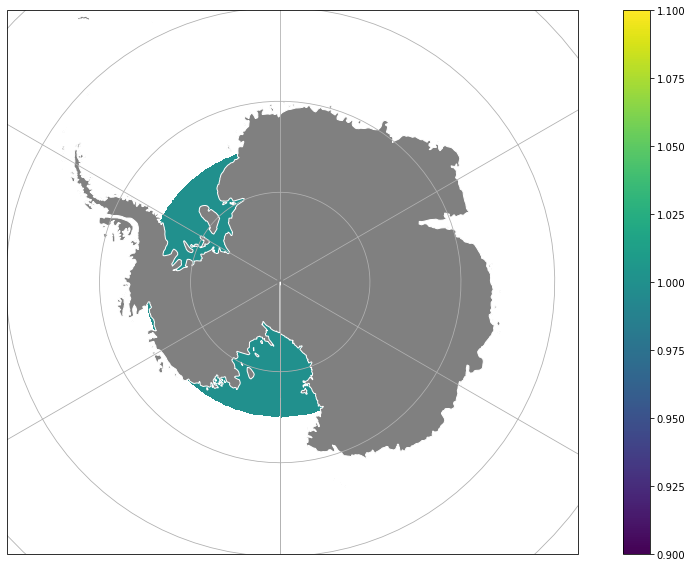

In [61]:
mask_latFRIS = ma.masked_where(lat_rho_10km > -75, np.ones(lon_rho_10km.shape))

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection=proj)
plt.pcolormesh(lon_rho_10km,lat_rho_10km,mask_latFRIS, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='white', facecolor='gray')
ax.gridlines()
# ax.set_extent([-80, -40, -84, -74], crs=ccrs.PlateCarree())
plt.colorbar()
plt.show()


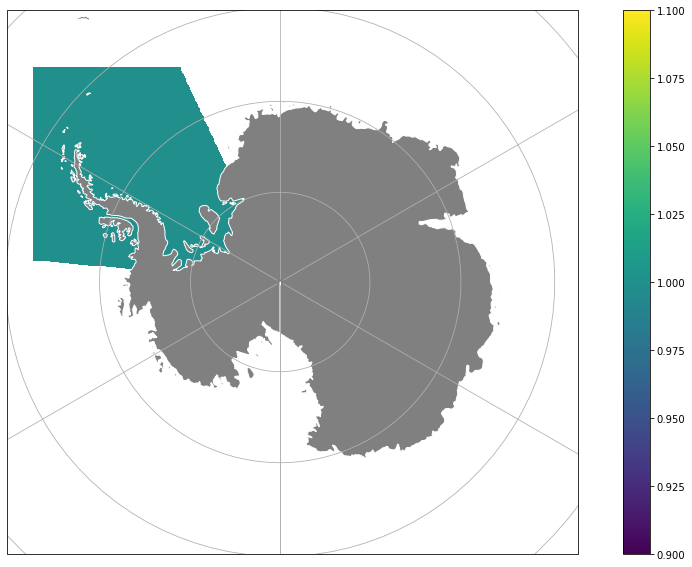

In [57]:
mask_lonFRIS_lt = ma.masked_where(lon_rho_10km >= -25, np.ones(lon_rho_10km.shape))
mask_lonFRIS_gt = ma.masked_where(lon_rho_10km <= -85, np.ones(lon_rho_10km.shape))
mask_lonFRIS = mask_lonFRIS_gt*mask_lonFRIS_lt

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection=proj)
plt.pcolormesh(lon_rho_10km,lat_rho_10km,mask_lonFRIS, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='white', facecolor='gray')
ax.gridlines()
# ax.set_extent([-80, -40, -84, -74], crs=ccrs.PlateCarree())
plt.colorbar()
plt.show()
